# Model Scaling

Visualization of how the performance scales with increased number of parameters.

Data for the other models is taken from their corresponding implementations and reported results.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import wandb


def get_eval_summary(artifact):
    api = wandb.Api()
    artifact = api.artifact(artifact)

    runs = artifact.used_by()
    eval_runs = list(
        filter(
            lambda run: run._attrs["jobType"] == "evaluation"
            and "test/best_mpjpe" in run.summary,
            runs,
        )
    )
    return eval_runs[-1].summary


mini_summary = get_eval_summary("ppierzc/propose_human36m/mpii-prod:latest")
large_summary = get_eval_summary("ppierzc/propose_human36m/mpii-prod-large:latest")
xlarge_summary = get_eval_summary("ppierzc/propose_human36m/mpii-prod-xlarge:v20")

In [4]:
num_params = np.array([852546, 3301546, 8318741])

test_mpjpe = np.array(
    [
        mini_summary["test/best_mpjpe"],
        large_summary["test/best_mpjpe"],
        xlarge_summary["test/best_mpjpe"],
    ]
)

hard_mpjpe = np.array(
    [
        mini_summary["hard/best_mpjpe"],
        large_summary["hard/best_mpjpe"],
        xlarge_summary["hard/best_mpjpe"],
    ]
)

occl_mpjpe = np.array(
    [
        mini_summary["occl/best_mpjpe"],
        large_summary["occl/best_mpjpe"],
        xlarge_summary["occl/best_mpjpe"],
    ]
)

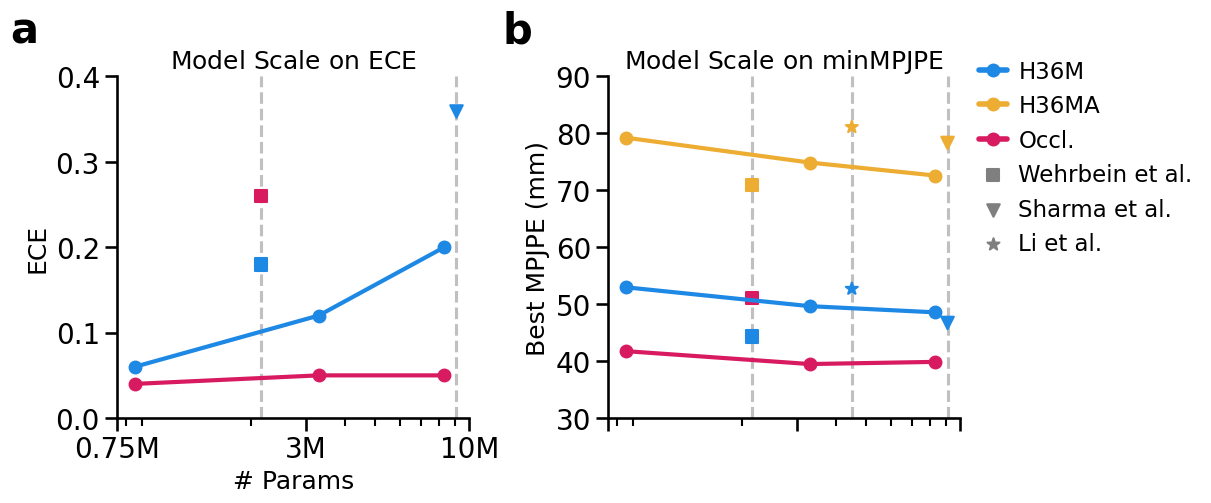

In [69]:
plt.style.use("default")
sns.set_context("talk")
plt.figure(figsize=(12.5, 5))

plt.subplot(1, 2, 1)

plt.axvline(2157176, c="silver", ls="--", zorder=-1)
plt.axvline(9100080, c="silver", ls="--", zorder=-1)

plt.plot(num_params, [0.06, 0.12, 0.20], marker="o", c="#1E88E5", label="H36M", lw=3)
plt.plot(num_params, [0.04, 0.05, 0.05], marker="o", c="#D81B60", label="Occl.", lw=3)

plt.scatter(
    [2157176, 2157176],
    [0.26, 0.18],
    c=["#D81B60", "#1E88E5"],
    marker="s",
    label="Wehrbein et al.",
)
plt.scatter([9100080], [0.36], c=["#1E88E5"], marker="v", label="Sharma et al.")

plt.xscale("log")
plt.xticks([0.75e6, 3e6, 1e7], ["0.75M", "3M", "10M"], fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("# Params")
plt.xlim(0.75e6, 1e7)
plt.title("Model Scale on $\\operatorname{ECE}$")
plt.ylabel("ECE")
plt.ylim(0, 0.4)
# Second
plt.subplot(1, 2, 2)

plt.axvline(2157176, c="silver", ls="--", zorder=-1)
plt.axvline(9100080, c="silver", ls="--", zorder=-1)
plt.axvline(4498682, c="silver", ls="--", zorder=-1)

plt.plot(num_params, test_mpjpe, marker="o", c="#1E88E5", label="H36M", lw=3)
plt.plot(num_params, hard_mpjpe, marker="o", c="#EDAC32", label="H36MA", lw=3)
plt.plot(num_params, occl_mpjpe, marker="o", c="#D81B60", label="Occl.", lw=3)

plt.scatter(
    [2157176, 2157176, 2157176],
    [
        70.9,
        51.1,
        44.3,
    ],
    c=["#EDAC32", "#D81B60", "#1E88E5"],
    marker="s",
    label="Wehrbein et al.",
)
plt.scatter(
    [9100080, 9100080],
    [78.3, 46.7],
    c=["#EDAC32", "#1E88E5"],
    marker="v",
    label="Sharma et al.",
)
plt.scatter(
    [4498682, 4498682],
    [81.1, 52.7],
    c=["#EDAC32", "#1E88E5"],
    marker="*",
    label="Li et al.",
)

plt.xscale("log")
plt.xticks([0.75e6, 3e6, 1e7], ["", "", ""], fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0.75e6, 1e7)
plt.title("Model Scale on $\\operatorname{minMPJPE}$")
plt.ylabel("Best MPJPE (mm)")
lgnd = plt.legend(loc=(1.028, 0.45), frameon=False, handletextpad=0.5, handlelength=1.2)
for h in lgnd.legendHandles[3:]:
    h.set_color("tab:gray")
for h in lgnd.legendHandles[:3]:
    h.set_linewidth(4.0)
    h.set_solid_capstyle("round")

plt.ylim(30, 90)
plt.tight_layout()

plt.gca().text(
    -1.7, 1.1, "a", transform=plt.gca().transAxes, weight="bold", fontsize=30
)
plt.gca().text(
    -0.3, 1.1, "b", transform=plt.gca().transAxes, weight="bold", fontsize=30
)

sns.despine()
plt.savefig("./model_scaling.pdf", dpi=150, bbox_inches="tight")